# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
from google.colab import files

uploaded = files.upload()


Saving CC_GENERAL.csv to CC_GENERAL.csv


In [3]:
#read the data

# data_path = ''  #the path where you downloaded the data
df = pd.read_csv('CC_GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
- correlation map
<br>

**comment each issue you find**

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6])

column TENURE is categoric

In [7]:
df['CREDIT_LIMIT'].unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

from this summary the data has null values

In [8]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

the coulmns that have null values:

1 - CREDIT_LIMIT  --- very small portion can be droped  
2 - MINIMUM_PAYMENTS   -- can be relaced with mean                                    

In [9]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

std of most of the columns is very large means wide range of values!

there are no values in negative but max of CASH_ADVANCE_FREQUENCY is out of range!

In [10]:
df1 = df['CASH_ADVANCE_FREQUENCY']> 1
df1.sum()
# those must be outliers

8

desided to drop them

In [11]:
df[df['CASH_ADVANCE_FREQUENCY']> 1]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
681   C10708  5656.069801           1.000000     362.36            362.36   
1626  C11680  2876.009336           1.000000     152.61            152.61   
2555  C12629  5906.184924           1.000000     141.80            141.80   
2608  C12684  7801.511533           1.000000     231.40            231.40   
3038  C13127  3846.742530           1.000000       0.00              0.00   
3253  C13347  5709.486507           0.833333       0.00              0.00   
8055  C18273  1917.895730           1.000000     285.07            285.07   
8365  C18588  3857.562230           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

In [12]:
df.drop(df[df['CASH_ADVANCE_FREQUENCY'] > 1].index, inplace=True)

In [13]:
df.shape

(8942, 18)

In [14]:
# feel free to investigate what you want
df.describe(include='object')

CUST_ID
count     8942
unique    8942
top     C10001
freq         1

In [15]:
df.duplicated().sum()


0

data has no duplicates

In [16]:
import seaborn as sns

In [17]:
df.columns.shape

(18,)

In [18]:
df.columns.to_list()[1:]

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

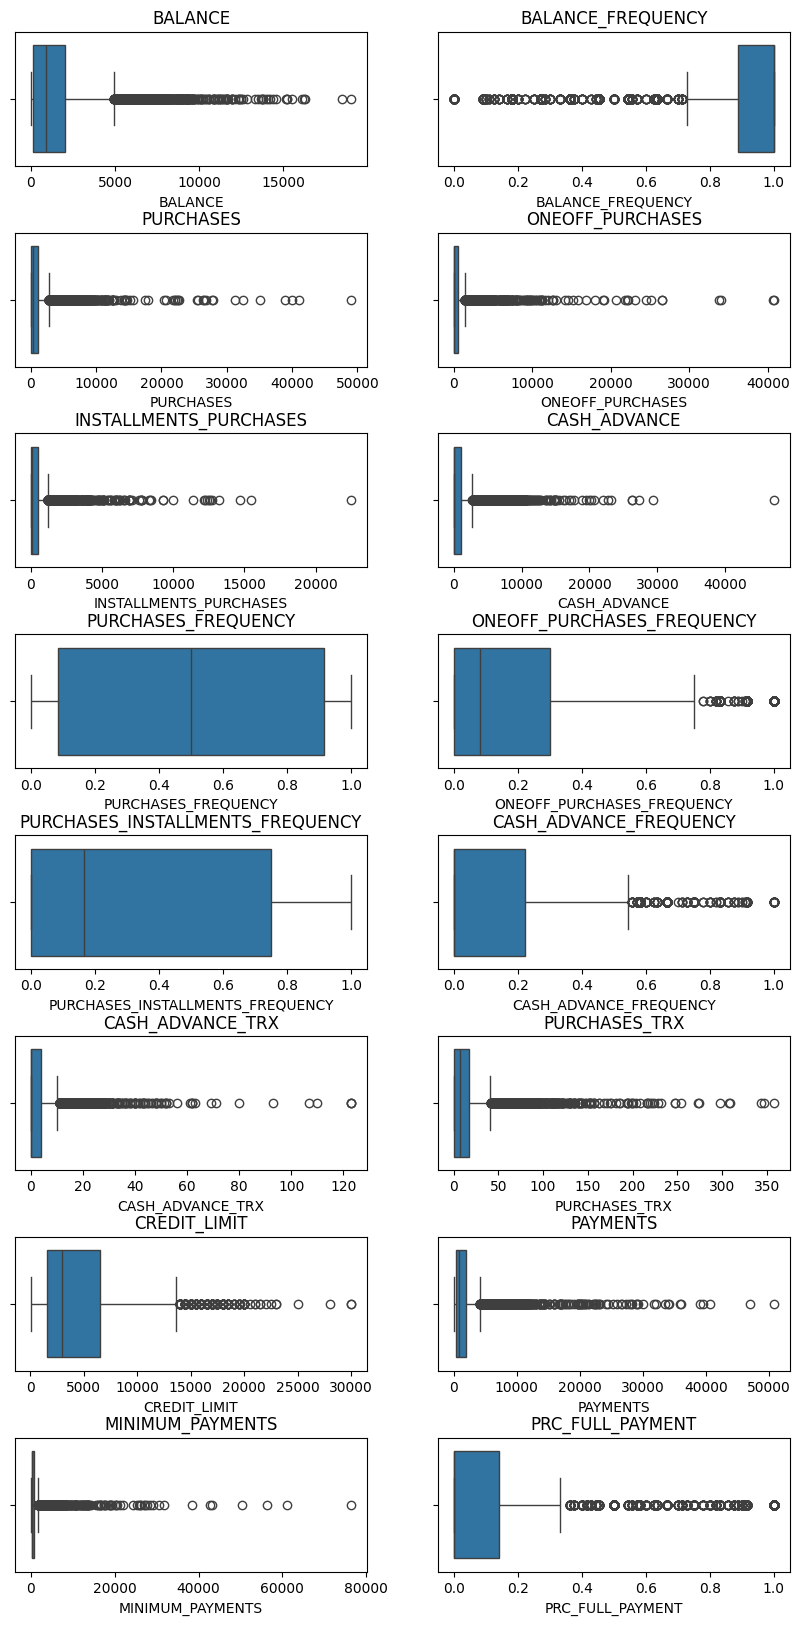

In [19]:
i = 1
plt.figure(figsize=(10, 20))
for column in df.columns.to_list()[1:-1]:
    plt.subplot(8, 2, i)
    i += 1
    sns.boxplot(x=df[column])
    plt.title(column)
plt.subplots_adjust(hspace=0.5)
plt.show()

there are too many outliers in the dataset

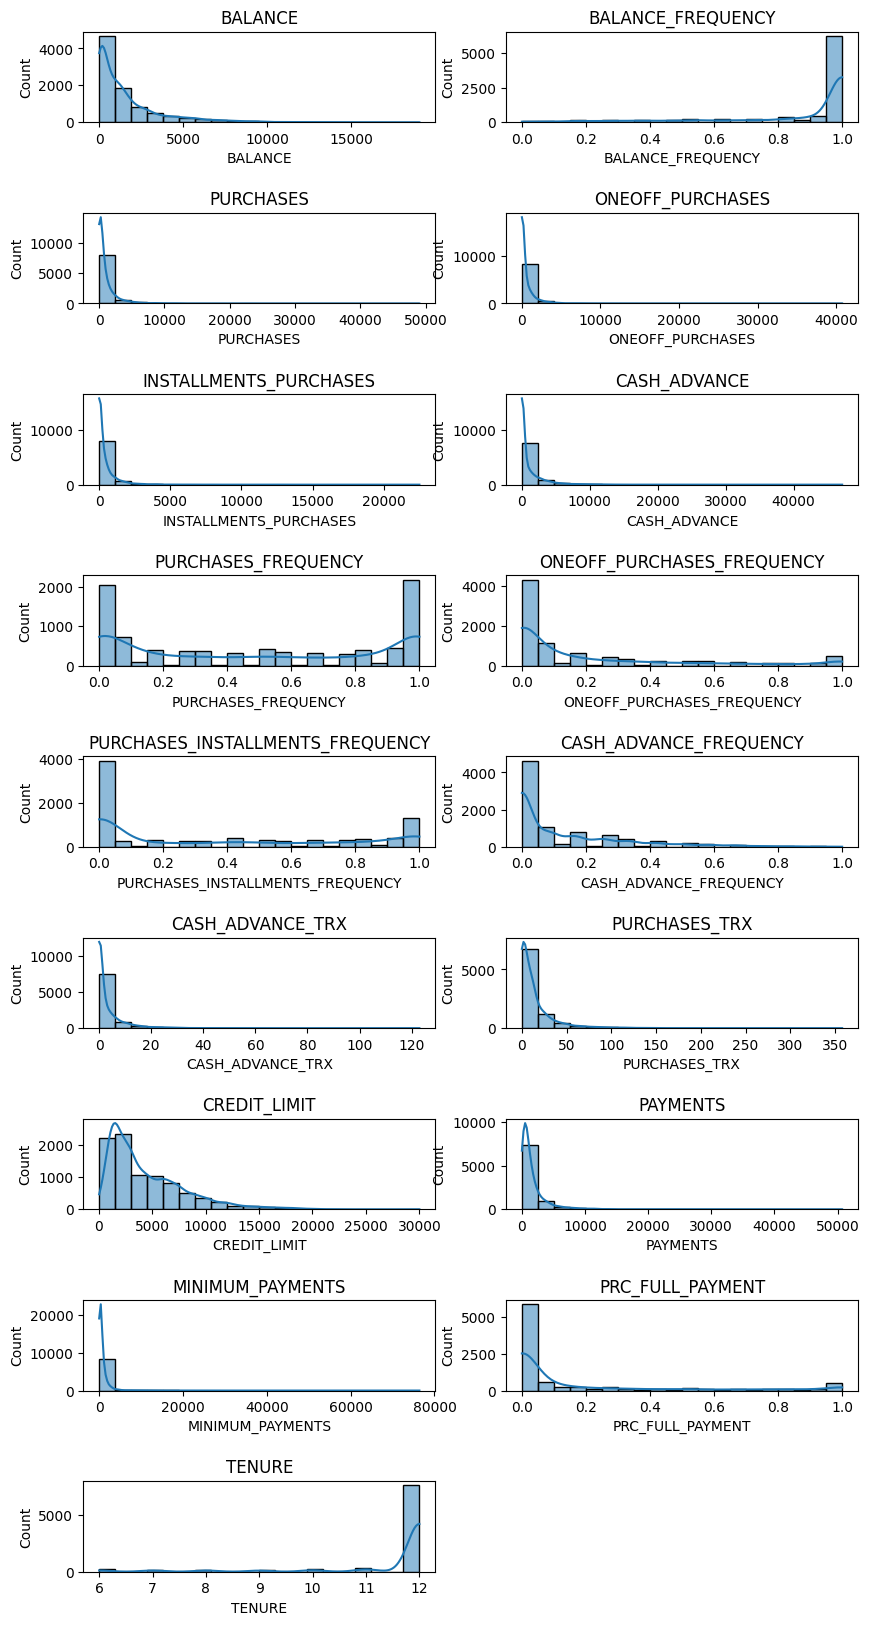

In [20]:
i = 1
plt.figure(figsize=(10, 20))
for column in df.columns.to_list()[1:]:
    plt.subplot(9, 2, i)
    i += 1
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(column)
plt.subplots_adjust(hspace=1)
plt.show()

the data is very skewed

In [21]:
df['MINIMUM_PAYMENTS'].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
452.084802    1
181.773223    1
711.894455    1
256.522546    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8628, dtype: int64

no not categoric!

<Axes: >

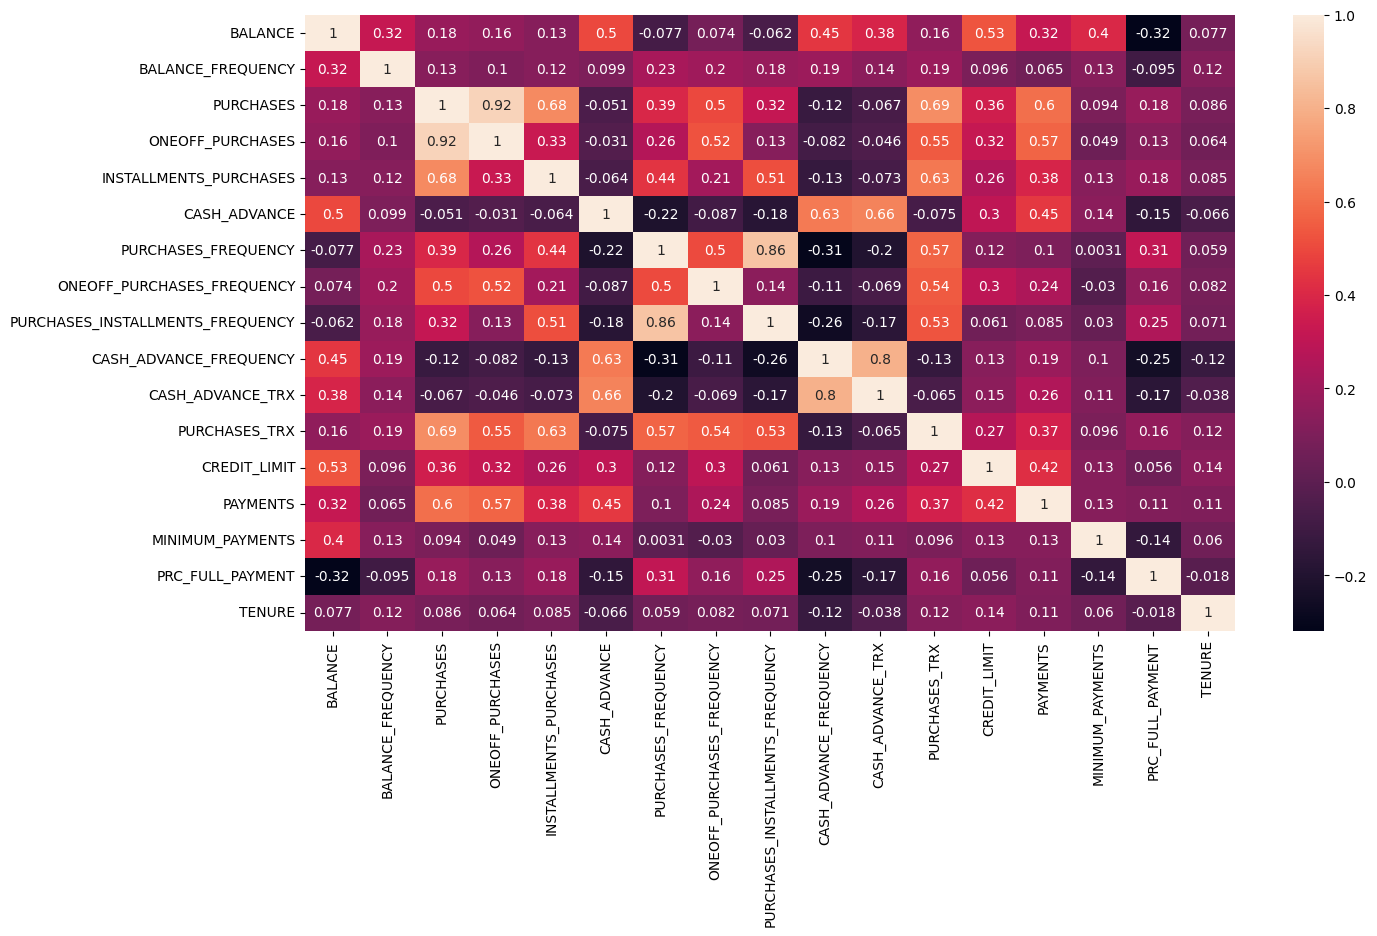

In [22]:
fig = plt.figure(figsize = (15, 8))
sns.heatmap(df.iloc[:,1:].corr() , annot=True)

there are highly corelated columns could means they are redundent or they are just related

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
0- drop id column          <br>
1- null values          <br>
2- redundent columns        <br>
3- outliers        <br>

In [23]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

In [24]:
df.drop('CUST_ID', axis=1, inplace=True)


In [25]:
df.shape

(8942, 17)

**First issue**

the coulmns that have null values:

1 - CREDIT_LIMIT  --- very small portion can be droped  
2 - MINIMUM_PAYMENTS   -- can be relaced with mean                                    

In [26]:
#solution
df.dropna(subset=['CREDIT_LIMIT'], inplace= True)
df['MINIMUM_PAYMENTS'].replace(np.NaN,df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [27]:
df.shape

(8941, 17)

In [28]:
#test
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue**

In [29]:
df.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322262   0.182023   
BALANCE_FREQUENCY                 0.322262           1.000000   0.133759   
PURCHASES                         0.182023           0.133759   1.000000   
ONEOFF_PURCHASES                  0.164910           0.104368   0.916843   
INSTALLMENTS_PURCHASES            0.127231           0.124403   0.679838   
CASH_ADVANCE                      0.496218           0.098899  -0.051134   
PURCHASES_FREQUENCY              -0.076911           0.229854   0.392848   
ONEOFF_PURCHASES_FREQUENCY        0.073639           0.202373   0.498420   
PURCHASES_INSTALLMENTS_FREQUENCY -0.062139           0.176307   0.315350   
CASH_ADVANCE_FREQUENCY            0.448506           0.192453  -0.119765   
CASH_ADVANCE_TRX                  0.384113           0.140939  -0.066567   
PURCHASES_TRX                     0.155234           0.189763   0.689498   
CREDIT_LIMIT                      0.530764           0.095633   0.357410   
PAYMENTS                          0.323616           0.064888   0.603330   
MINIMUM_PAYMENTS                  0.394599           0.114189   0.093521   
PRC_FULL_PAYMENT                 -0.318777          -0.095128   0.180203   
TENURE                            0.076570           0.120084   0.085472   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164910                0.127231   
BALANCE_FREQUENCY                         0.104368                0.124403   
PURCHASES                                 0.916843                0.679838   
ONEOFF_PURCHASES                          1.000000                0.330542   
INSTALLMENTS_PURCHASES                    0.330542                1.000000   
CASH_ADVANCE                             -0.031121               -0.063813   
PURCHASES_FREQUENCY                       0.264798                0.442260   
ONEOFF_PURCHASES_FREQUENCY                0.524890                0.213984   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127531                0.511201   
CASH_ADVANCE_FREQUENCY                   -0.082391               -0.131856   
CASH_ADVANCE_TRX                         -0.045809               -0.073299   
PURCHASES_TRX                             0.545472                0.628022   
CREDIT_LIMIT                              0.320053                0.256931   
PAYMENTS                                  0.567342                0.384109   
MINIMUM_PAYMENTS                          0.048592                0.131710   
PRC_FULL_PAYMENT                          0.132640                0.182373   
TENURE                                    0.063583                0.085249   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496218            -0.076911   
BALANCE_FREQUENCY                     0.098899             0.229854   
PURCHASES                            -0.051134             0.392848   
ONEOFF_PURCHASES                     -0.031121             0.264798   
INSTALLMENTS_PURCHASES               -0.063813             0.442260   
CASH_ADVANCE                          1.000000            -0.215110   
PURCHASES_FREQUENCY                  -0.215110             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086949             0.501263   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.176315             0.862874   
CASH_ADVANCE_FREQUENCY                0.631235            -0.308412   
CASH_ADVANCE_TRX                      0.656286            -0.202537   
PURCHASES_TRX                        -0.075410             0.568280   
CREDIT_LIMIT                          0.303772             0.120485   
PAYMENTS                              0.453735             0.103251   
MINIMUM_PAYMENTS                      0.139205             0.002972   
PRC_FULL_PAYMENT                     -0.152540             0.305513   
TENURE                               -0.066227        

looking at corr > 80%
- ONEOFF_PURCHASES is highly correlated with PURCHASES but it must be so not going to drop
- PURCHASES_INSTALLMENTS_FREQUENCY is highly correlated with PURCHASES_FREQUENCY but it must be so not going to drop
- CASH_ADVANCE_FREQUENCY is highly correlated with CASH_ADVANCE_TRX and i see it is redundent can only keep CASH_ADVANCE_FREQUENCY

In [30]:
#solution
df.drop('CASH_ADVANCE_TRX', axis=1, inplace=True)


**Third issue**

In [31]:
df.shape

(8941, 16)

In [32]:
#solution
#the data is right skewed so can try log transform on features that are not scaled
open_limits_features = ['BALANCE',
                          'PURCHASES',
                          'ONEOFF_PURCHASES',
                          'INSTALLMENTS_PURCHASES',
                          'CASH_ADVANCE', 'CREDIT_LIMIT',
                          'PAYMENTS',
                          'MINIMUM_PAYMENTS',
                          'PURCHASES_TRX'
                          ]
bounded_limits_features = ['BALANCE_FREQUENCY',
                      'PURCHASES_FREQUENCY',
                      'ONEOFF_PURCHASES_FREQUENCY',
                      'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY',
                      'PRC_FULL_PAYMENT',
                      'TENURE' ]
log_scaled_data = np.log1p(df[open_limits_features])
log_scaled_data[bounded_limits_features] = df[bounded_limits_features]
log_scaled_data.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
3  7.419183   7.313220          7.313220                0.000000   
4  6.707735   2.833213          2.833213                0.000000   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES_TRX  \
0      0.000000      6.908755  5.312231          4.945277       1.098612   
1      8.770896      8.853808  8.319725          6.978531       0.000000   
2      0.000000      8.922792  6.434654          6.442994       2.564949   
3      5.331694      8.922792  0.000000          6.762937       0.693147   
4      0.000000      7.090910  6.521114          5.504483       0.693147   

   BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0           0.818182             0.166667                    0.000000   
1           0.909091             0.000000                    0.000000   
2           1.000000             1.000000                    1.000000   
3           0.636364             0.083333                    0.083333   
4           1.000000             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  \
0                          0.083333                0.000000          0.000000   
1                          0.000000                0.250000          0.222222   
2                          0.000000                0.000000          0.000000   
3                          0.000000                0.083333          0.000000   
4                          0.000000                0.000000          0.000000   

   TENURE  
0      12  
1      12  
2      12  
3      12  
4      12

In [33]:
log_scaled_data.shape

(8941, 16)

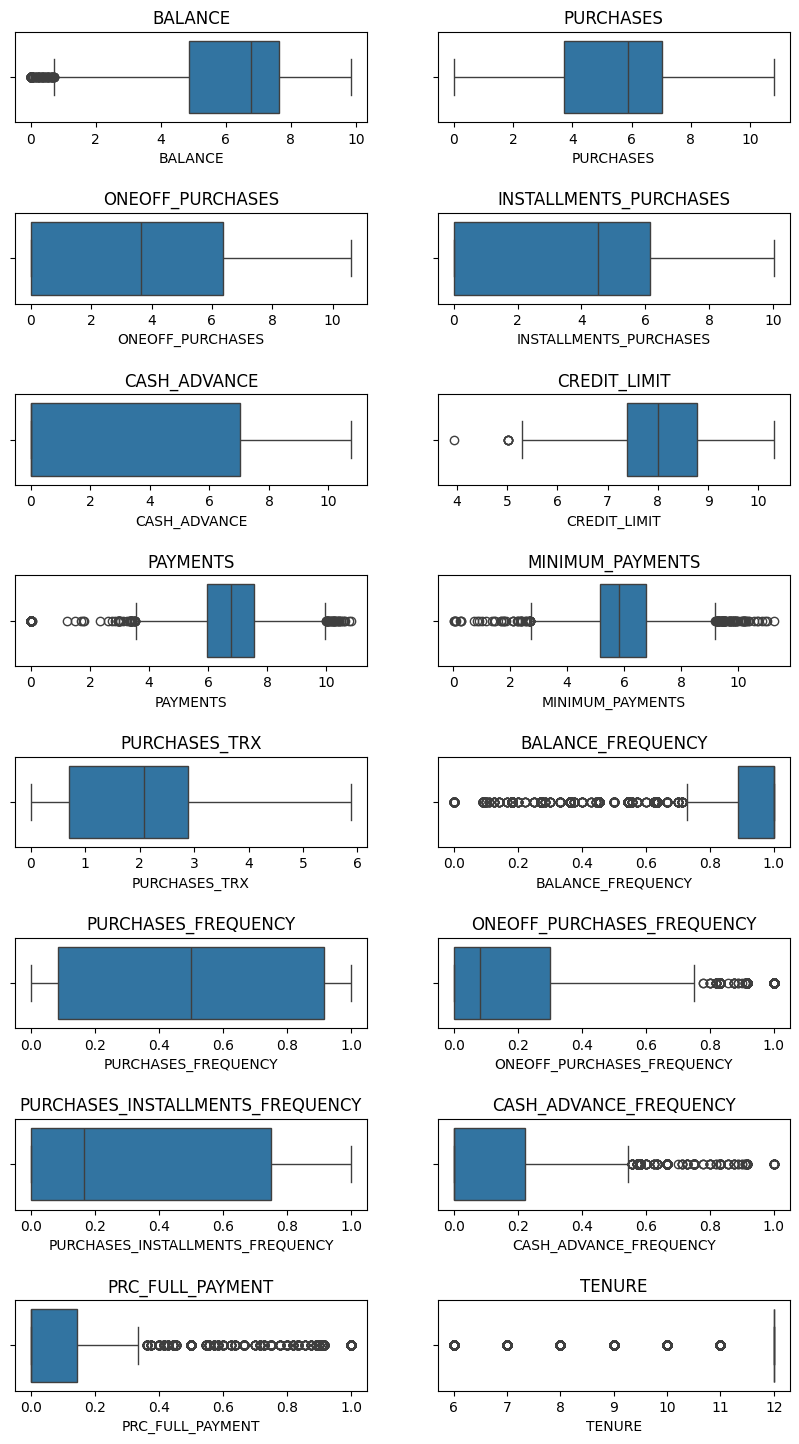

In [34]:
#test
i = 1
plt.figure(figsize=(10, 20))
for column in log_scaled_data.columns.to_list():
    plt.subplot(9, 2, i)
    i += 1
    sns.boxplot(x=log_scaled_data[column])
    plt.title(column)
plt.subplots_adjust(hspace=1)
plt.show()

In [35]:
# for column in df.columns.to_list()[:-1]:
#     bins = np.linspace(df[column].min(),df[column].max(),endpoint= True,num=20)
#     df[column] = pd.cut(df[column], bins, labels= np.arange(1,20,).tolist(), include_lowest = True)


In [36]:
# df = df.astype(int)


In [37]:
# df.head()

In [38]:
# df.info()

In [39]:
# i = 1
# plt.figure(figsize=(10, 20))
# for column in df.columns.to_list():
#     plt.subplot(9, 2, i)
#     i += 1
#     sns.boxplot(x=df[column])
#     plt.title(column)
# plt.subplots_adjust(hspace=1)
# plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:

scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled_df = pd.DataFrame(data = df_scaled, columns = df.columns)


In [42]:
df_scaled.shape

(8941, 16)

In [43]:
df_scaled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731363          -0.249412  -0.425134         -0.357050   
1  0.788911           0.134388  -0.469767         -0.357050   
2  0.448789           0.518189  -0.108034          0.108558   
3  0.050406          -1.017012   0.231550          0.545658   
4 -0.357824           0.518189  -0.462281         -0.347414   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349397     -0.465958            -0.807365   
1               -0.454852      2.608374            -1.222618   
2               -0.454852     -0.465958             1.268895   
3               -0.454852     -0.367764            -1.014993   
4               -0.454852     -0.465958            -1.014993   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678659                         -0.708180   
1                   -0.678659                         -0.917845   
2                    2.672242                         -0.917845   
3                   -0.399419                         -0.917845   
4                   -0.399419                         -0.917845   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0               -0.678923      -0.511676     -0.959889 -0.528992   
1                0.585890      -0.592110      0.689259  0.818192   
2               -0.678923      -0.109509      0.826688 -0.383865   
3               -0.257320      -0.551893      0.826688 -0.598678   
4               -0.678923      -0.551893     -0.904917 -0.364434   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     -3.108095e-01         -0.525889  0.359427  
1      8.927972e-02          0.233613  0.359427  
2     -1.016037e-01         -0.525889  0.359427  
3     -4.876007e-17         -0.525889  0.359427  
4     -2.656545e-01         -0.525889  0.359427

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

In [44]:
from sklearn.cluster import KMeans

In [45]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(log_scaled_data)
    cost.append(kmean.inertia_)

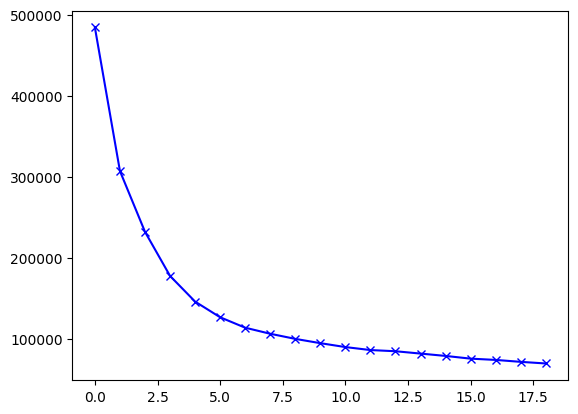

In [46]:
plt.plot(cost, 'bx-')

k = 5

In [47]:
k_means = KMeans(
    n_clusters = 5,
    random_state = 42
)

k_means.fit(log_scaled_data)

KMeans(n_clusters=5, random_state=42)

In [48]:
labels=k_means.labels_

In [49]:
labels

array([4, 0, 1, ..., 4, 0, 1], dtype=int32)

In [50]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000            2.0        1000.0   201.802084   
1                0.250000            0.0        7000.0  4103.032597   
2                0.000000           12.0        7500.0   622.066742   
3                0.083333            1.0        7500.0     0.000000   
4                0.000000            1.0        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        139.509787          0.000000    12.0      4.0  
1       1072.340217          0.222222    12.0      0.0  
2        627.284787          0.000000    12.0      1.0  
3        864.179560          0.000000    12.0      1.0  
4        244.791237          0.000000    12.0      1.0

In [51]:
from sklearn.metrics import silhouette_score
silhouette_score(log_scaled_data, k_means.fit_predict(log_scaled_data))

0.4016307225670072

k = 6

In [52]:
k_means = KMeans(
    n_clusters = 6,
    random_state = 42
)

k_means.fit(log_scaled_data)

KMeans(n_clusters=6, random_state=42)

In [53]:
labels=k_means.labels_

In [54]:
clusters_1=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters_1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000            2.0        1000.0   201.802084   
1                0.250000            0.0        7000.0  4103.032597   
2                0.000000           12.0        7500.0   622.066742   
3                0.083333            1.0        7500.0     0.000000   
4                0.000000            1.0        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        139.509787          0.000000    12.0      3.0  
1       1072.340217          0.222222    12.0      2.0  
2        627.284787          0.000000    12.0      5.0  
3        864.179560          0.000000    12.0      4.0  
4        244.791237          0.000000    12.0      5.0

In [55]:
silhouette_score(log_scaled_data, k_means.fit_predict(log_scaled_data))

0.41432008275504206

higher silhouette_score at k = 6

In [56]:
%matplotlib inline


**t-SNE**

In [57]:
from sklearn.manifold import TSNE
import plotly.express as px

In [58]:
# Apply t-SNE to reduce the dimensionality to 2
tsne = TSNE(
    n_components=2,
    random_state=42
)
tsne_result_2d = tsne.fit_transform(log_scaled_data)

In [59]:
tsne_result_2d

array([[ 12.182074  , -46.25474   ],
       [-73.18294   ,   0.72961396],
       [  5.8154354 ,  23.232464  ],
       ...,
       [ -4.212592  , -32.485382  ],
       [-59.677605  , -39.896534  ],
       [-16.571835  ,  77.09433   ]], dtype=float32)

In [60]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

looking at t-SNE seems like there are 7 clusters not 6

In [61]:
k_means = KMeans(
    n_clusters = 7,
    random_state = 42
)

k_means.fit(log_scaled_data)

KMeans(n_clusters=7, random_state=42)

In [62]:
labels=k_means.labels_

In [63]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000            2.0        1000.0   201.802084   
1                0.250000            0.0        7000.0  4103.032597   
2                0.000000           12.0        7500.0   622.066742   
3                0.083333            1.0        7500.0     0.000000   
4                0.000000            1.0        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        139.509787          0.000000    12.0      4.0  
1       1072.340217          0.222222    12.0      2.0  
2        627.284787          0.000000    12.0      1.0  
3        864.179560          0.000000    12.0      5.0  
4        244.791237          0.000000    12.0      1.0

In [64]:
silhouette_score(log_scaled_data, k_means.fit_predict(log_scaled_data))

0.4309447328097192

In [65]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

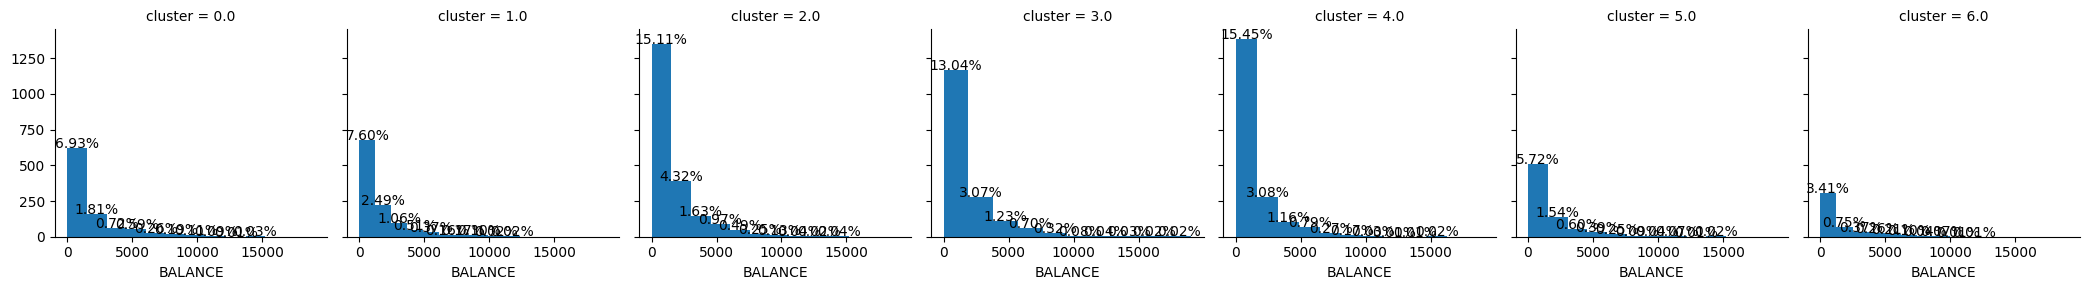

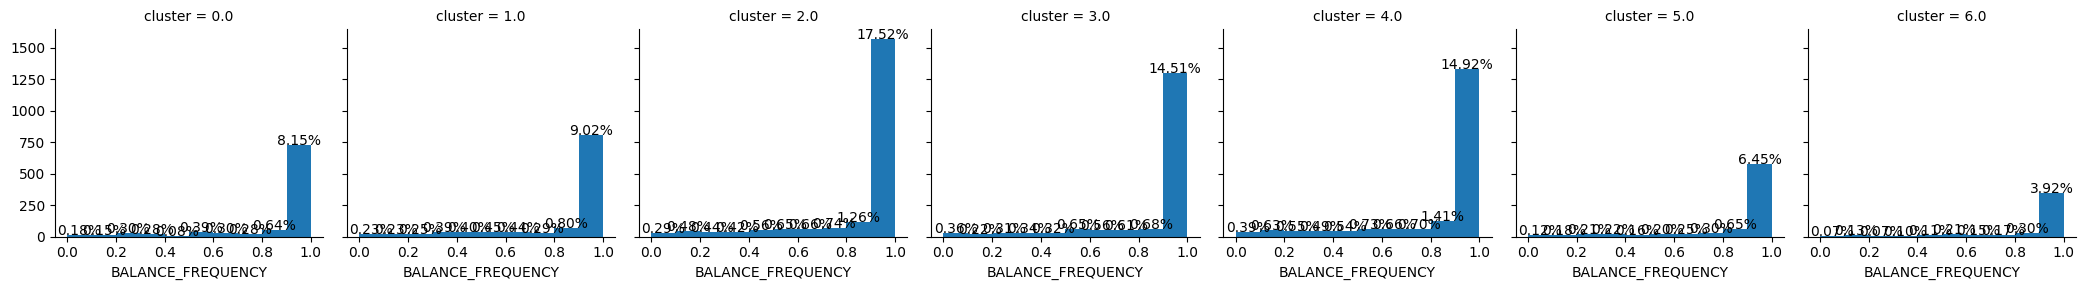

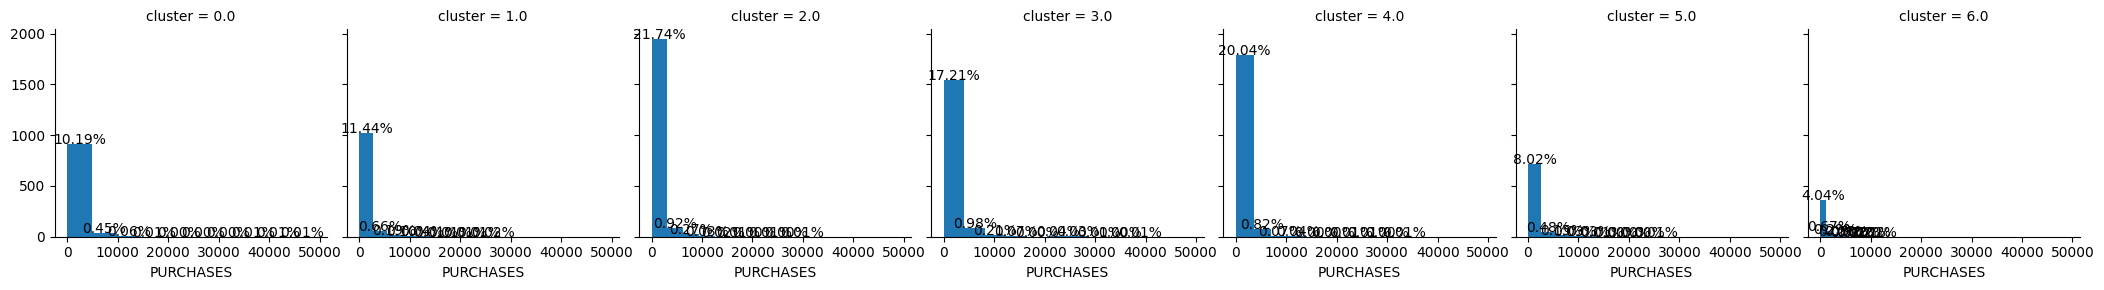

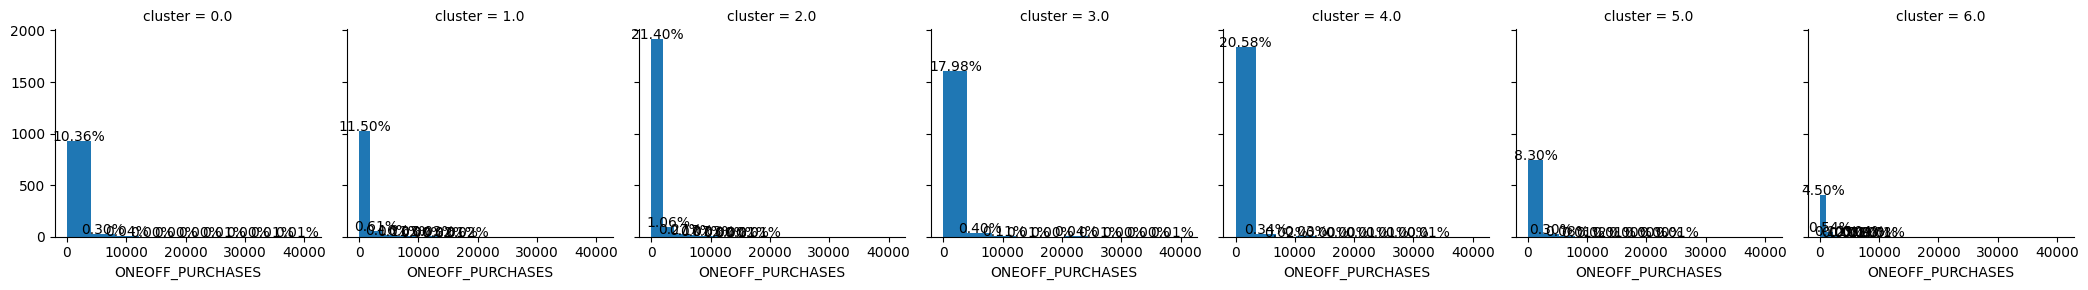

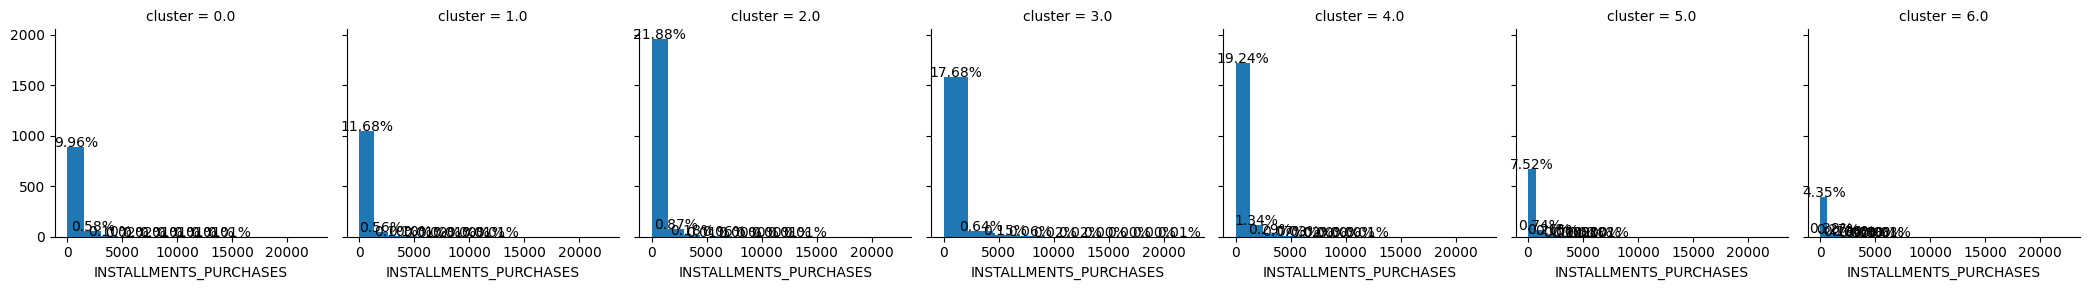

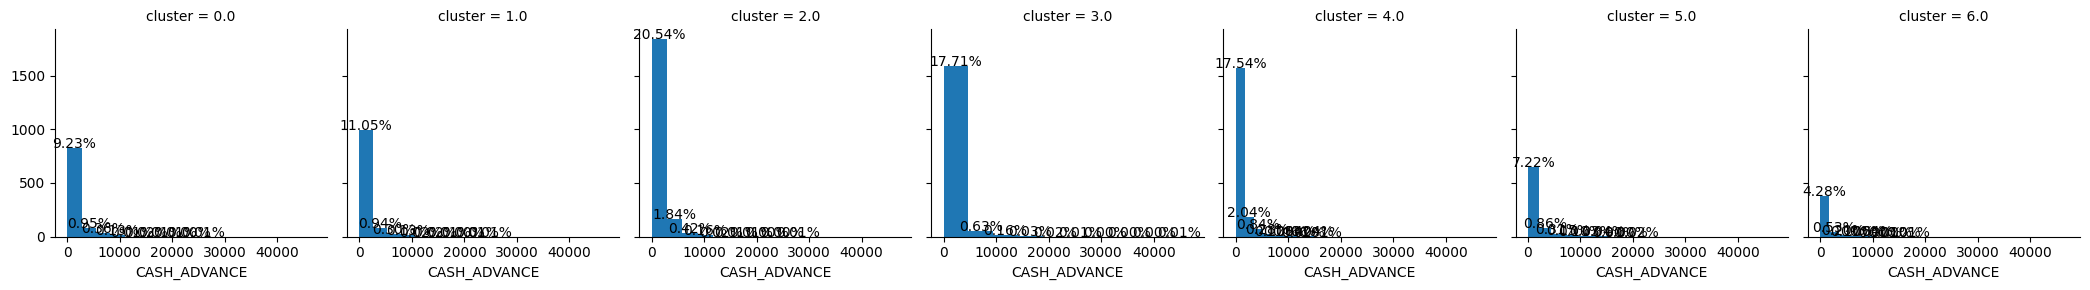

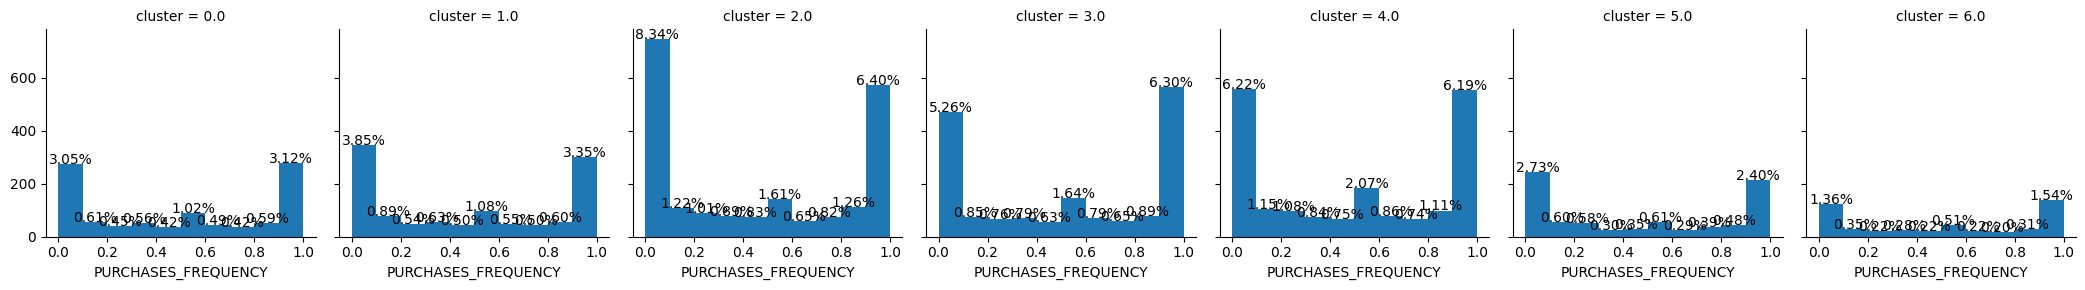

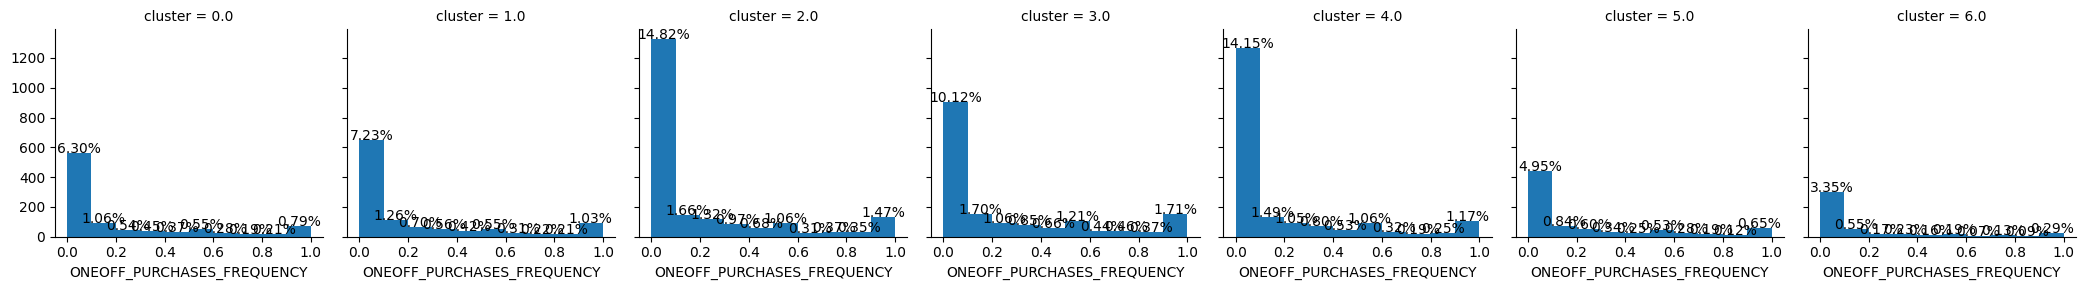

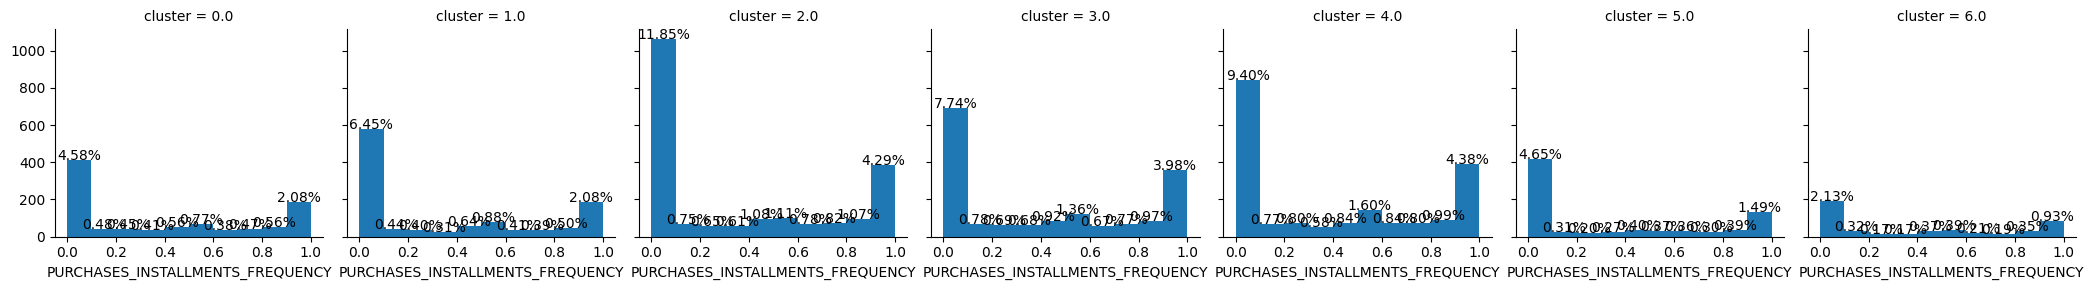

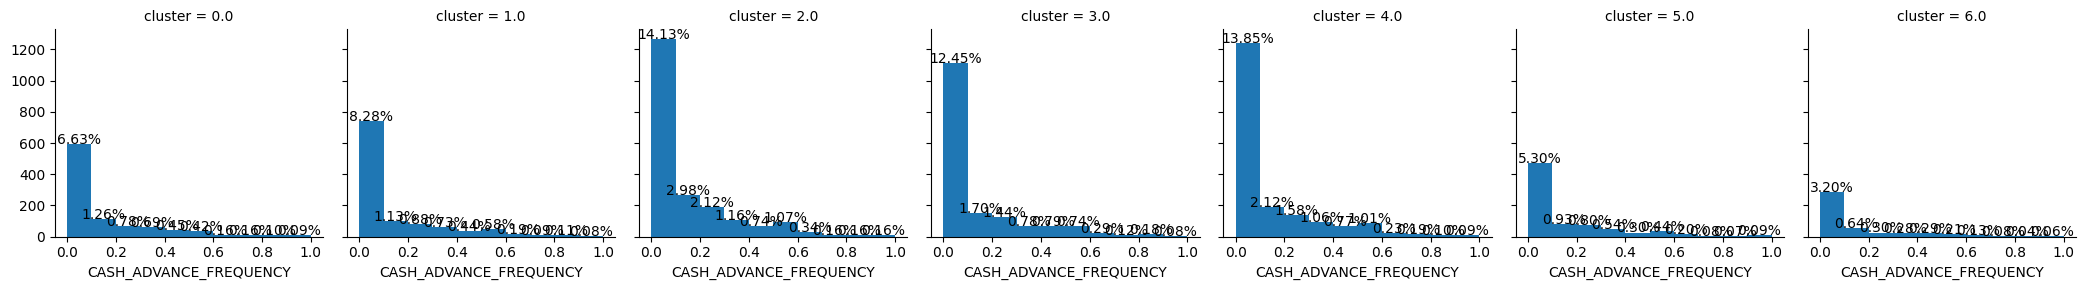

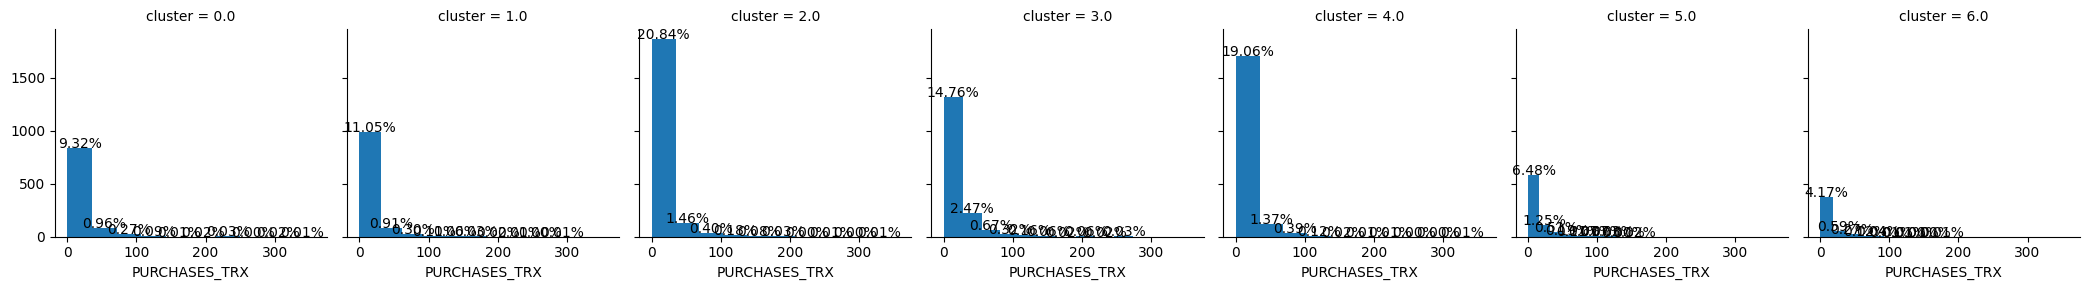

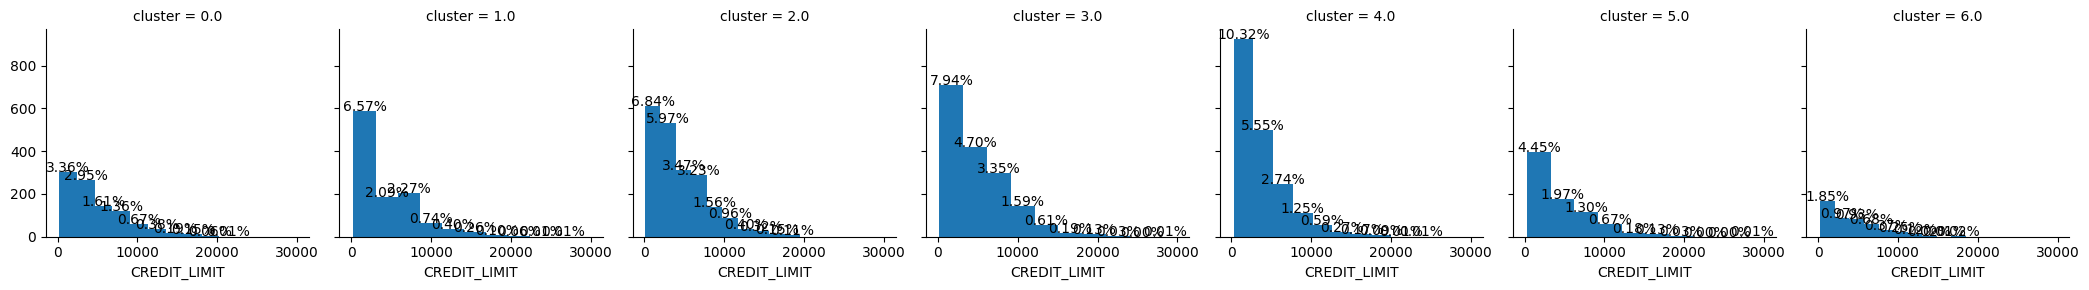

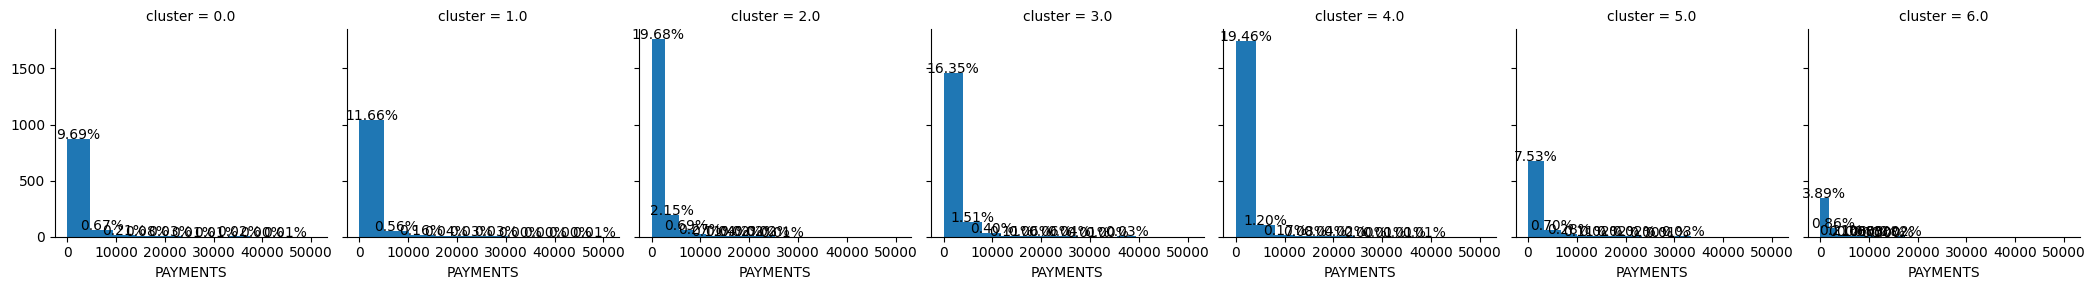

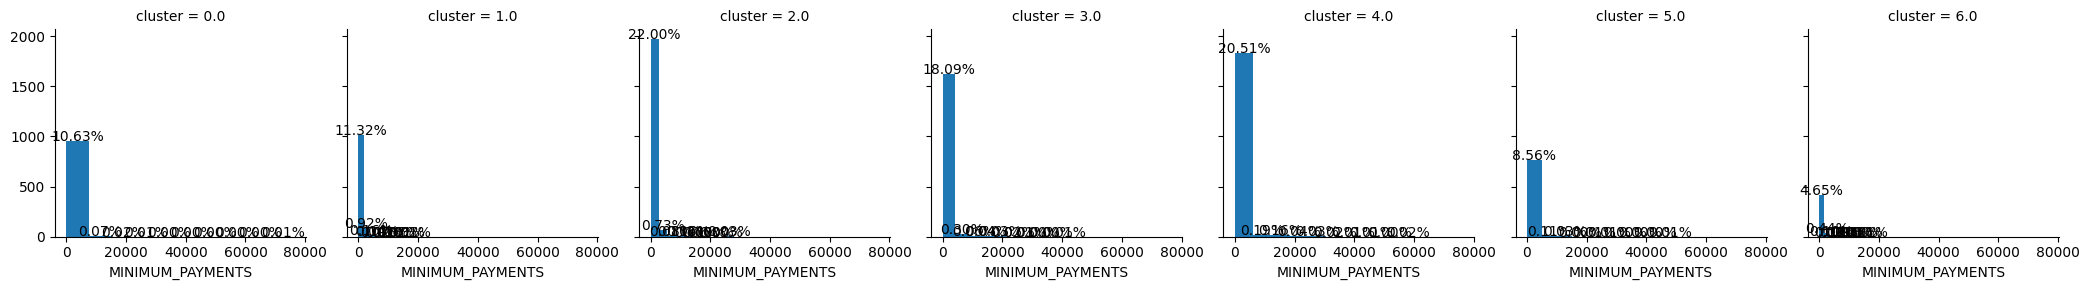

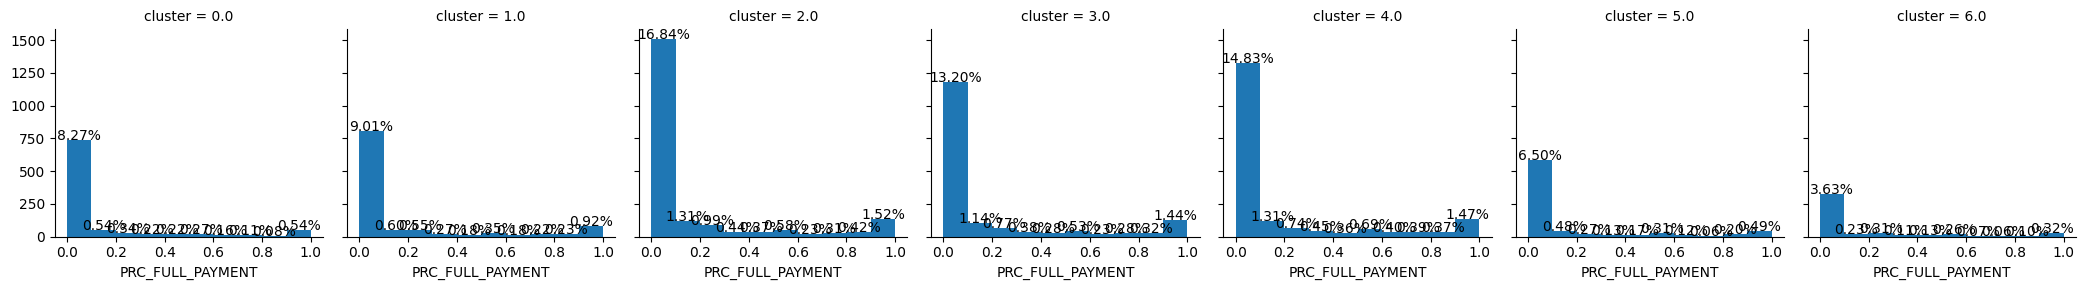

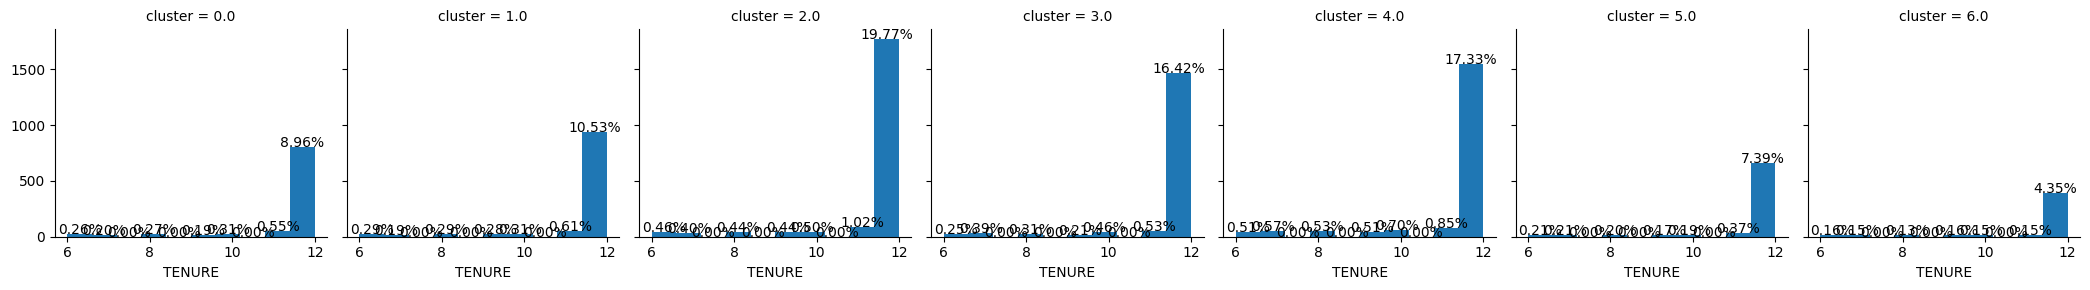

In [66]:
for feature in clusters_1.columns:  # Iterate over columns in clusters_1
    if feature != 'cluster':  # Exclude the 'cluster' column from plotting
        grid = sns.FacetGrid(clusters, col='cluster')
        grid.map(plt.hist, feature)

        # Add percentage annotations
        for ax in grid.axes.flat:
            for patch in ax.patches:
                height = patch.get_height()
                ax.text(
                    patch.get_x() + patch.get_width() / 2, height + 0.05,
                    f'{(height / len(clusters)) * 100:.2f}%',
                    ha='center'
                )

plt.show()

* **Cluster0** People with low payments

* **Cluster1** This group has more people with average credit limit and their balance and payments are also average

* **Cluster2** Less money spenders with low credit limits who purchases mostly in installments

* **Cluster3** People with lots of purshases and do more installments

* **Cluster4** people who pay cash in advance frequently

* **Cluster5** average customers in payments and balance
* **Cluster6** minimum customers customers in payments and balance

**PCA**

In [67]:
from sklearn.decomposition import PCA

In [68]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
PCA_result_2d = pca.fit_transform(log_scaled_data)
pca.explained_variance_ratio_

array([0.47075993, 0.22980712])

In [69]:
PCA_result_2d

array([[ 0.78524132, -5.59571813],
       [-8.88953027,  1.80101655],
       [ 2.55744059,  1.51531054],
       ...,
       [ 1.25695631, -6.16334311],
       [-6.02528382, -5.3762036 ],
       [ 0.40815603,  2.68405935]])

In [70]:
# Visualizing PCA reduction
PCA_2d_fig = px.scatter(
    x = PCA_result_2d[:, 0],
    y = PCA_result_2d[:, 1],
    color = labels,
    title = "PCA Cluster Visualization (2D)"
)
PCA_2d_fig.show()

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance  
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

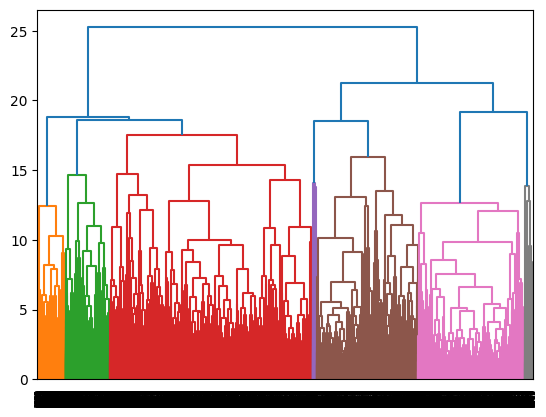

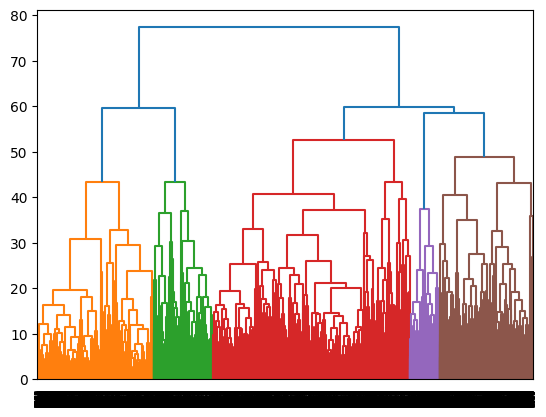

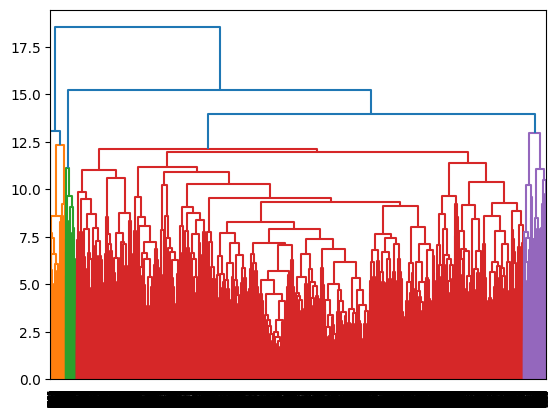

In [74]:
link = 'complete'
for dist in distance_metrics:
  link_mat = linkage(log_scaled_data,method= link, metric= dist)
  dendrogram(link_mat)
  plt.show()

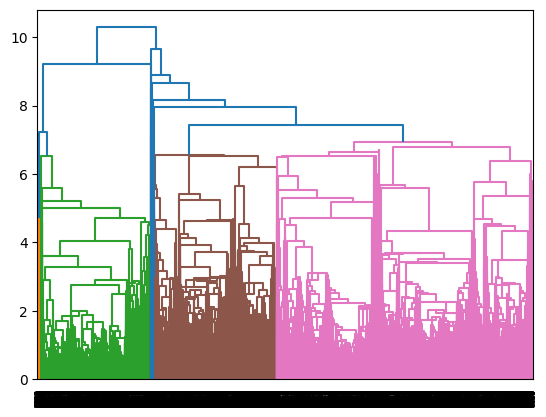

In [75]:
link_mat = linkage(log_scaled_data,method='centroid', metric='euclidean')
dendrogram(link_mat)
plt.show()

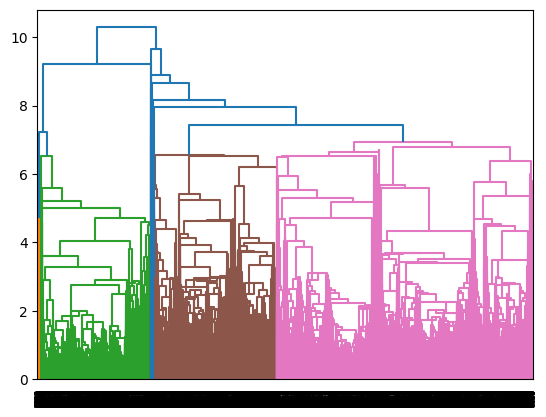

In [76]:
link_mat = linkage(log_scaled_data,method='centroid', metric='euclidean')
dendrogram(link_mat)
plt.show()

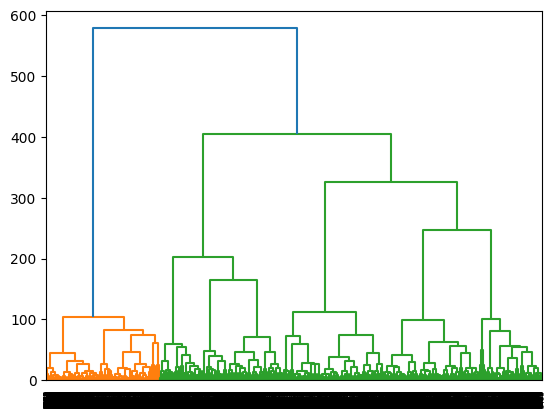

In [77]:
link_mat = linkage(log_scaled_data,method='ward', metric='euclidean')
dendrogram(link_mat)
plt.show()

decided to choose ward with euclidean distance and cut to have 7 clusters

In [78]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=7,linkage='ward', affinity='euclidean').fit(log_scaled_data)
labels = clustering.labels_

In [79]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

### DBSCAN
with grid search

In [85]:
from sklearn.cluster import DBSCAN

In [123]:
epsilons = np.linspace(1, 10, num=8)
epsilons

array([ 1.        ,  2.28571429,  3.57142857,  4.85714286,  6.14285714,
        7.42857143,  8.71428571, 10.        ])

In [124]:
min_samples = np.arange(100, 800, step=50)
min_samples

array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750])

In [125]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(1.0, 100),
 (1.0, 150),
 (1.0, 200),
 (1.0, 250),
 (1.0, 300),
 (1.0, 350),
 (1.0, 400),
 (1.0, 450),
 (1.0, 500),
 (1.0, 550),
 (1.0, 600),
 (1.0, 650),
 (1.0, 700),
 (1.0, 750),
 (2.2857142857142856, 100),
 (2.2857142857142856, 150),
 (2.2857142857142856, 200),
 (2.2857142857142856, 250),
 (2.2857142857142856, 300),
 (2.2857142857142856, 350),
 (2.2857142857142856, 400),
 (2.2857142857142856, 450),
 (2.2857142857142856, 500),
 (2.2857142857142856, 550),
 (2.2857142857142856, 600),
 (2.2857142857142856, 650),
 (2.2857142857142856, 700),
 (2.2857142857142856, 750),
 (3.5714285714285716, 100),
 (3.5714285714285716, 150),
 (3.5714285714285716, 200),
 (3.5714285714285716, 250),
 (3.5714285714285716, 300),
 (3.5714285714285716, 350),
 (3.5714285714285716, 400),
 (3.5714285714285716, 450),
 (3.5714285714285716, 500),
 (3.5714285714285716, 550),
 (3.5714285714285716, 600),
 (3.5714285714285716, 650),
 (3.5714285714285716, 700),
 (3.5714285714285716, 750),
 (4.857142857142858, 100),
 (4.857

In [126]:
N = len(combinations)

In [127]:
N

112

In [128]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(log_scaled_data)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 10):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(silhouette_score(log_scaled_data, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, log_scaled_data)

Combination (1.0, 100) on iteration 1 of 112 has 1 clusters. Moving on
Combination (1.0, 150) on iteration 2 of 112 has 0 clusters. Moving on
Combination (1.0, 200) on iteration 3 of 112 has 0 clusters. Moving on
Combination (1.0, 250) on iteration 4 of 112 has 0 clusters. Moving on
Combination (1.0, 300) on iteration 5 of 112 has 0 clusters. Moving on
Combination (1.0, 350) on iteration 6 of 112 has 0 clusters. Moving on
Combination (1.0, 400) on iteration 7 of 112 has 0 clusters. Moving on
Combination (1.0, 450) on iteration 8 of 112 has 0 clusters. Moving on
Combination (1.0, 500) on iteration 9 of 112 has 0 clusters. Moving on
Combination (1.0, 550) on iteration 10 of 112 has 0 clusters. Moving on
Combination (1.0, 600) on iteration 11 of 112 has 0 clusters. Moving on
Combination (1.0, 650) on iteration 12 of 112 has 0 clusters. Moving on
Combination (1.0, 700) on iteration 13 of 112 has 0 clusters. Moving on
Combination (1.0, 750) on iteration 14 of 112 has 0 clusters. Moving on
I

In [129]:
best_dict

{'best_epsilon': 2.2857142857142856,
 'best_min_samples': 100,
 'best_labels': array([ 0,  1,  2, ..., -1, -1, -1]),
 'best_score': 0.33112368095932604}

In [130]:
labels = best_dict['best_labels']
clusters_1=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters_1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000            2.0        1000.0   201.802084   
1                0.250000            0.0        7000.0  4103.032597   
2                0.000000           12.0        7500.0   622.066742   
3                0.083333            1.0        7500.0     0.000000   
4                0.000000            1.0        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        139.509787          0.000000    12.0      0.0  
1       1072.340217          0.222222    12.0      1.0  
2        627.284787          0.000000    12.0      2.0  
3        864.179560          0.000000    12.0     -1.0  
4        244.791237          0.000000    12.0      2.0

In [131]:
clusters_1['cluster'].value_counts()

 1.0    1850
-1.0    1683
 3.0    1582
 0.0    1528
 2.0     862
 5.0     698
 4.0     491
 6.0     247
Name: cluster, dtype: int64

In [132]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

it found the best fit to be 7 clusters with 1683 outliers in the data which seems convenient as the data already has too many outliers but still not the best clustering result so Random forest isolation can show if this result is convienent or not

### Random Forest Isolation
to detect anomalities

In [141]:
from sklearn.ensemble import IsolationForest

In [142]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
labels = iso_forest.fit_predict(log_scaled_data)

In [143]:
clusters_1=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters_1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000            2.0        1000.0   201.802084   
1                0.250000            0.0        7000.0  4103.032597   
2                0.000000           12.0        7500.0   622.066742   
3                0.083333            1.0        7500.0     0.000000   
4                0.000000            1.0        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        139.509787          0.000000    12.0      1.0  
1       1072.340217          0.222222    12.0      1.0  
2        627.284787          0.000000    12.0      1.0  
3        864.179560          0.000000    12.0      1.0  
4        244.791237          0.000000    12.0      1.0

In [147]:
clusters_1['cluster'].value_counts()

 1.0    8494
-1.0     447
Name: cluster, dtype: int64

In [148]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

Outliers marked in blue were scattered throughout the t-SNE plot suggesting the potential anomalies in various regions of the dataset which are very lower than the outliers that DBSCAN identified

### GMM
it is best to initialize with kmeans and make covariance type to be full


In [133]:
from sklearn.mixture import GaussianMixture

In [137]:
gmm = GaussianMixture( n_components = 7,
    covariance_type = "full",
    init_params =  "kmeans",)
gmm.fit(log_scaled_data)
labels = gmm.predict(log_scaled_data)

In [138]:
clusters_1=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters_1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000            2.0        1000.0   201.802084   
1                0.250000            0.0        7000.0  4103.032597   
2                0.000000           12.0        7500.0   622.066742   
3                0.083333            1.0        7500.0     0.000000   
4                0.000000            1.0        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        139.509787          0.000000    12.0      3.0  
1       1072.340217          0.222222    12.0      2.0  
2        627.284787          0.000000    12.0      4.0  
3        864.179560          0.000000    12.0      5.0  
4        244.791237          0.000000    12.0      4.0

In [139]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

all of the different algorithms shows that these are the 7 clusters in data but this seems like the most accurate

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try different technique to deal with outliers other than log scaling
- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method